# Evaluate Evokded response

In [2]:
import mne

epochs --> evoked

Evoked objects typically store EEG or MEG signals that have been averaged over multiple epochs, which is a common technique for estimating stimulus-evoked activity. The data in an Evoked object are stored in an array of shape (n_channels, n_times) (in contrast to an Epochs object, which stores data of shape (n_epochs, n_channels, n_times)). 

In [3]:
root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
raw_file = root / 'sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_file, verbose=False)

events = mne.find_events(raw, stim_channel='STI 014')
# we'll skip the "face" and "buttonpress" conditions to save memory
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4}
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                    preload=True)
evoked = epochs['auditory/left'].average()

del raw  # reduce memory usage

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
289 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 289 events and 601 original time points ...
0 bad epochs dropped


In [4]:
print(f'Epochs baseline: {epochs.baseline}')
print(f'Evoked baseline: {evoked.baseline}')

Epochs baseline: (-0.2996928197375818, 0.0)
Evoked baseline: (-0.2996928197375818, 0.0)


Evoked viz

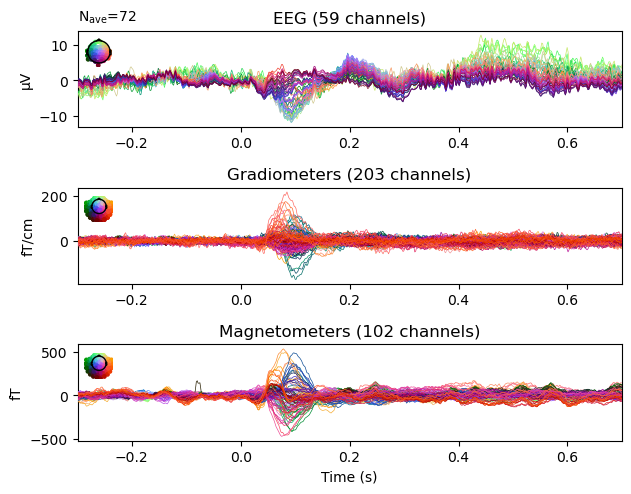

In [6]:
evoked.plot();

In [7]:
# selecting, dropping, reordering channels
evoked_eeg = evoked.copy().pick_types(meg=False, eeg=True)
print(evoked_eeg.ch_names)

new_order = ['EEG 002', 'MEG 2521', 'EEG 003']
evoked_subset = evoked.copy().reorder_channels(new_order)
print(evoked_subset.ch_names)

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033', 'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039', 'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051', 'EEG 052', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
['EEG 002', 'MEG 2521', 'EEG 003']


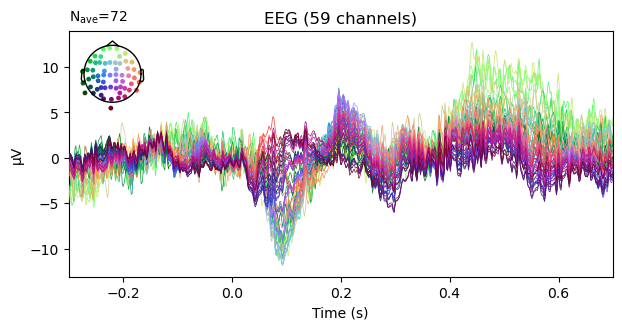

In [9]:
evoked.plot(picks='eeg');

Baseline after loading: (-0.2996928197375818, 0.0)
Applying baseline correction (mode: mean)
Baseline after calling apply_baseline(): (-0.2996928197375818, 0.0)


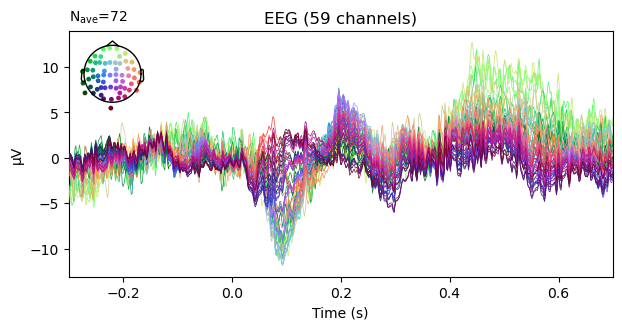

In [11]:
# Original baseline (none set)
print(f'Baseline after loading: {evoked.baseline}')

# Apply a custom baseline correction
evoked.apply_baseline((None, 0))
print(f'Baseline after calling apply_baseline(): {evoked.baseline}')

# Visualize the evoked response
evoked.plot(picks='eeg');

In [12]:
# combine evoked objects

left_right_aud = epochs['auditory'].average()
left_right_aud

<Evoked | '0.50 × auditory/left + 0.50 × auditory/right' (average, N=145), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 366 ch, ~5.0 MB>

In [13]:
left_aud = epochs['auditory/left'].average()
right_aud = epochs['auditory/right'].average()
print([evok.nave for evok in (left_aud, right_aud)])

[72, 73]


In [14]:
import numpy as np

import mne

In [15]:
root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
evk_file = root / 'sample_audvis-ave.fif'
evokeds_list = mne.read_evokeds(evk_file, baseline=(None, 0), proj=True,
                                verbose=False)

# Show condition names and baseline intervals
for e in evokeds_list:
    print(f'Condition: {e.comment}, baseline: {e.baseline}')

Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


In [16]:
conds = ('aud/left', 'aud/right', 'vis/left', 'vis/right')
evks = dict(zip(conds, evokeds_list))
#      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ this is equivalent to:
# {'aud/left': evokeds_list[0], 'aud/right': evokeds_list[1],
#  'vis/left': evokeds_list[2], 'vis/right': evokeds_list[3]}

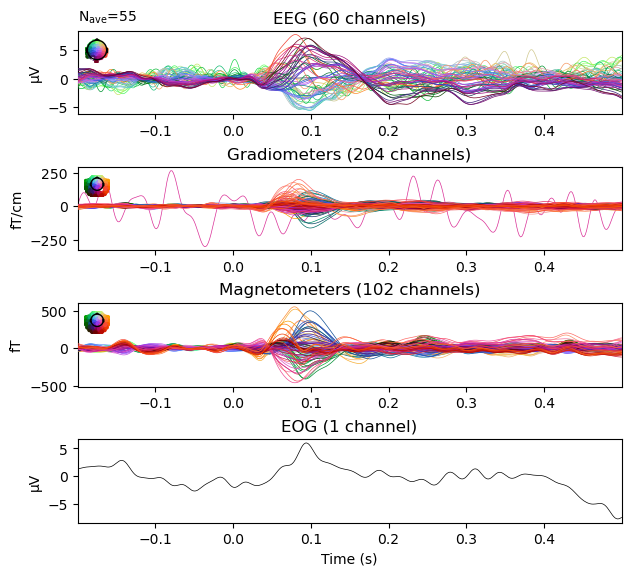

In [17]:
evks['aud/left'].plot(exclude=[]);

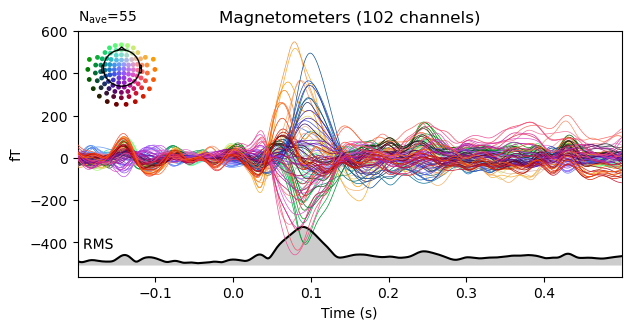

In [18]:
evks['aud/left'].plot(picks='mag', spatial_colors=True, gfp=True);

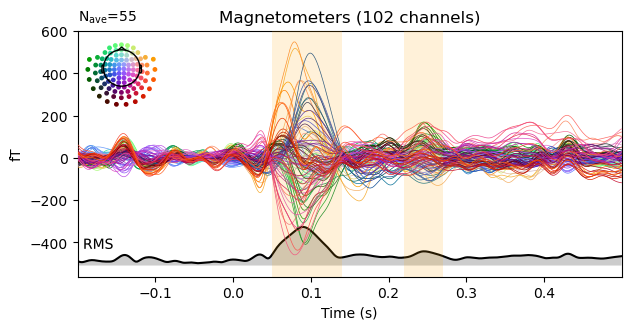

In [19]:
time_ranges_of_interest = [
    (0.05, 0.14),
    (0.22, 0.27)
]
evks['aud/left'].plot(
    picks='mag', spatial_colors=True, gfp=True,
    highlight=time_ranges_of_interest
);

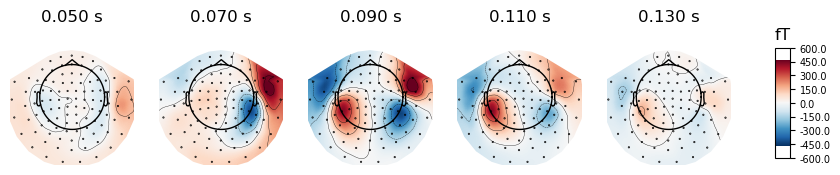

In [20]:
times = np.linspace(0.05, 0.13, 5)
evks['aud/left'].plot_topomap(ch_type='mag', times=times, colorbar=True);

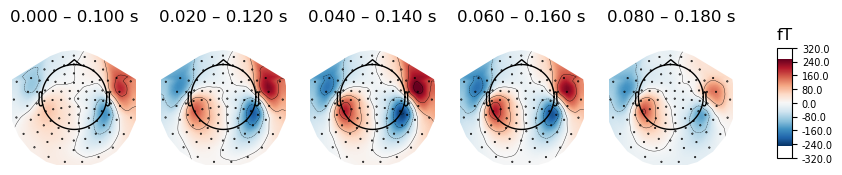

In [21]:
fig = evks['aud/left'].plot_topomap(ch_type='mag', times=times, average=0.1);

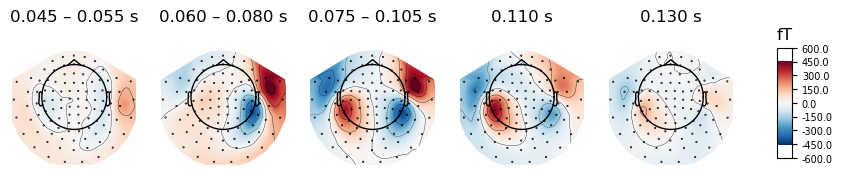

In [22]:
averaging_durations = [0.01, 0.02, 0.03, None, None]
fig = evks['aud/left'].plot_topomap(
    ch_type='mag', times=times, average=averaging_durations
);

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


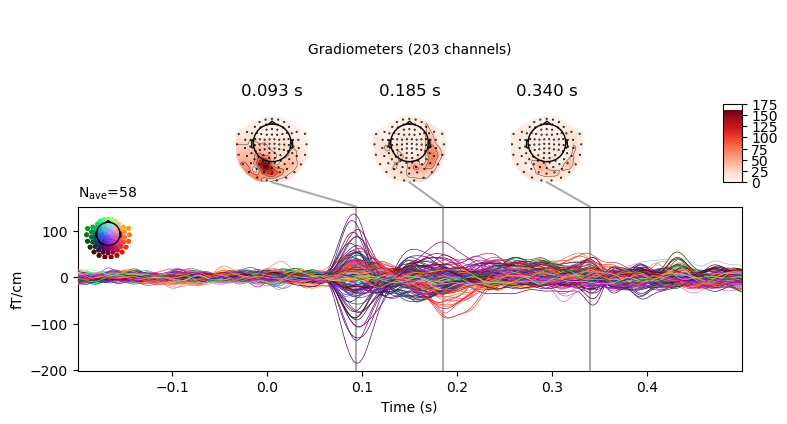

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


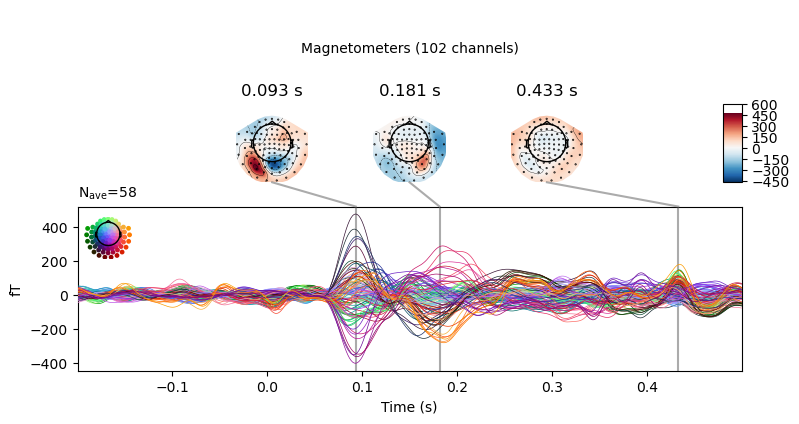

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


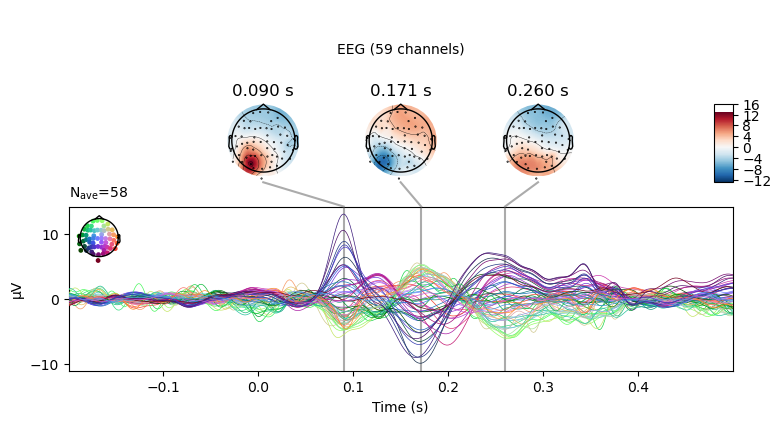

In [25]:
evks['vis/right'].plot_joint();

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


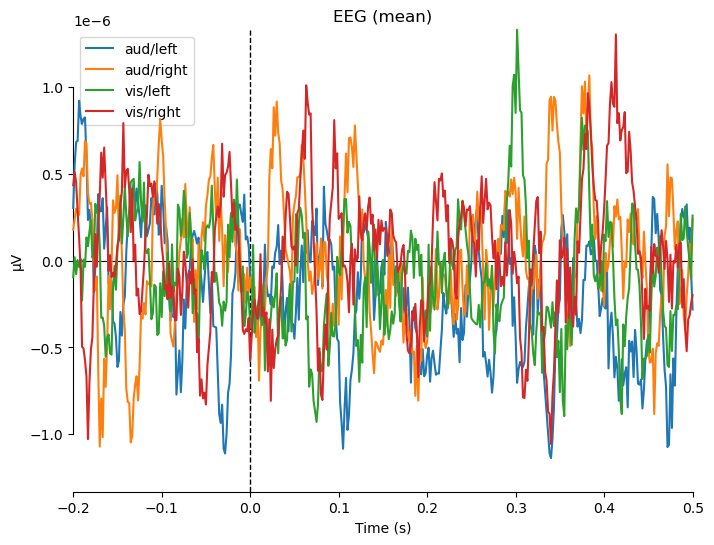

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


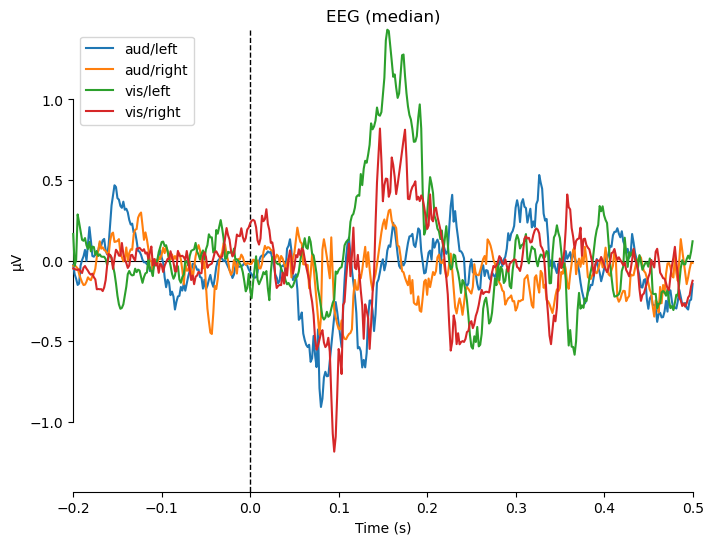

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


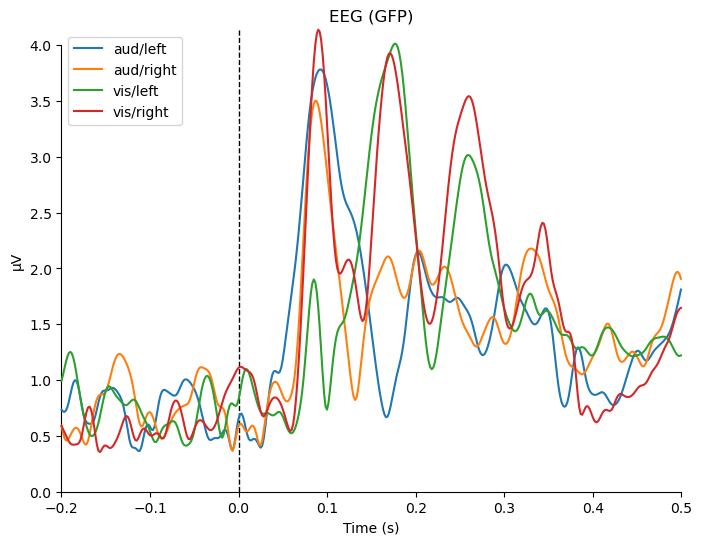

combining channels using "<function custom_func at 0x7fe94795f5e0>"
combining channels using "<function custom_func at 0x7fe94795f5e0>"
combining channels using "<function custom_func at 0x7fe94795f5e0>"
combining channels using "<function custom_func at 0x7fe94795f5e0>"


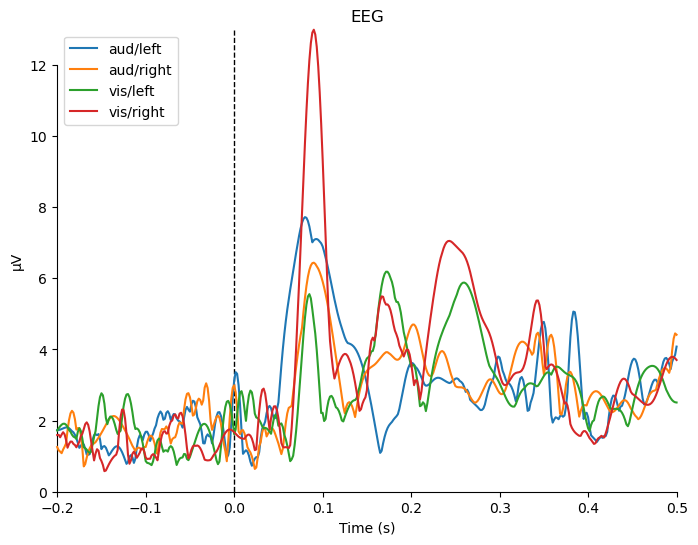

In [26]:
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evks, picks='eeg', combine=combine)

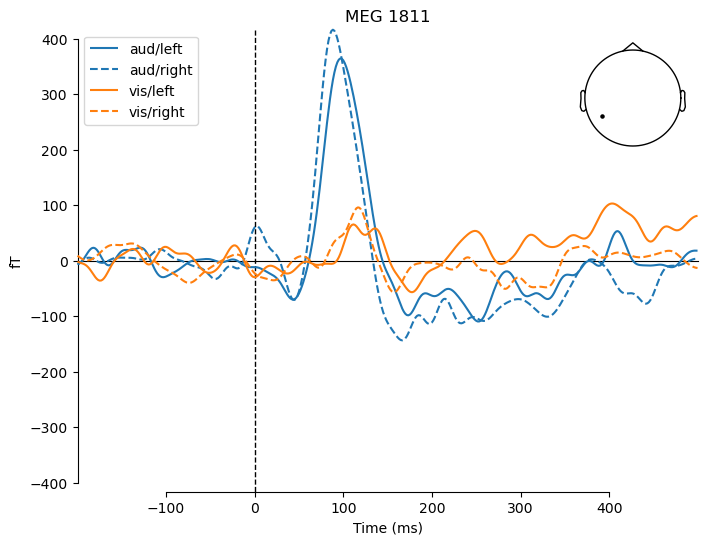

In [27]:
mne.viz.plot_compare_evokeds(evks, picks='MEG 1811', colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'),
                             time_unit='ms');

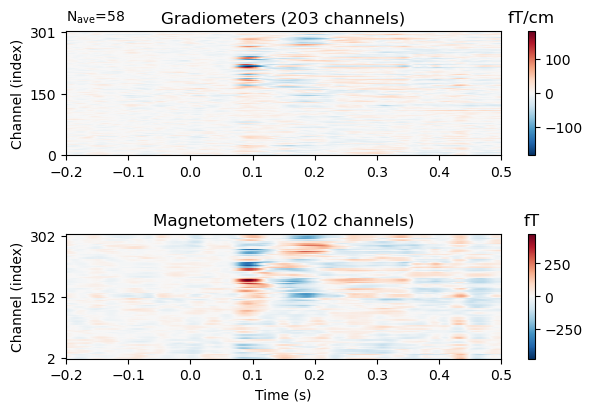

In [28]:
evks['vis/right'].plot_image(picks='meg');

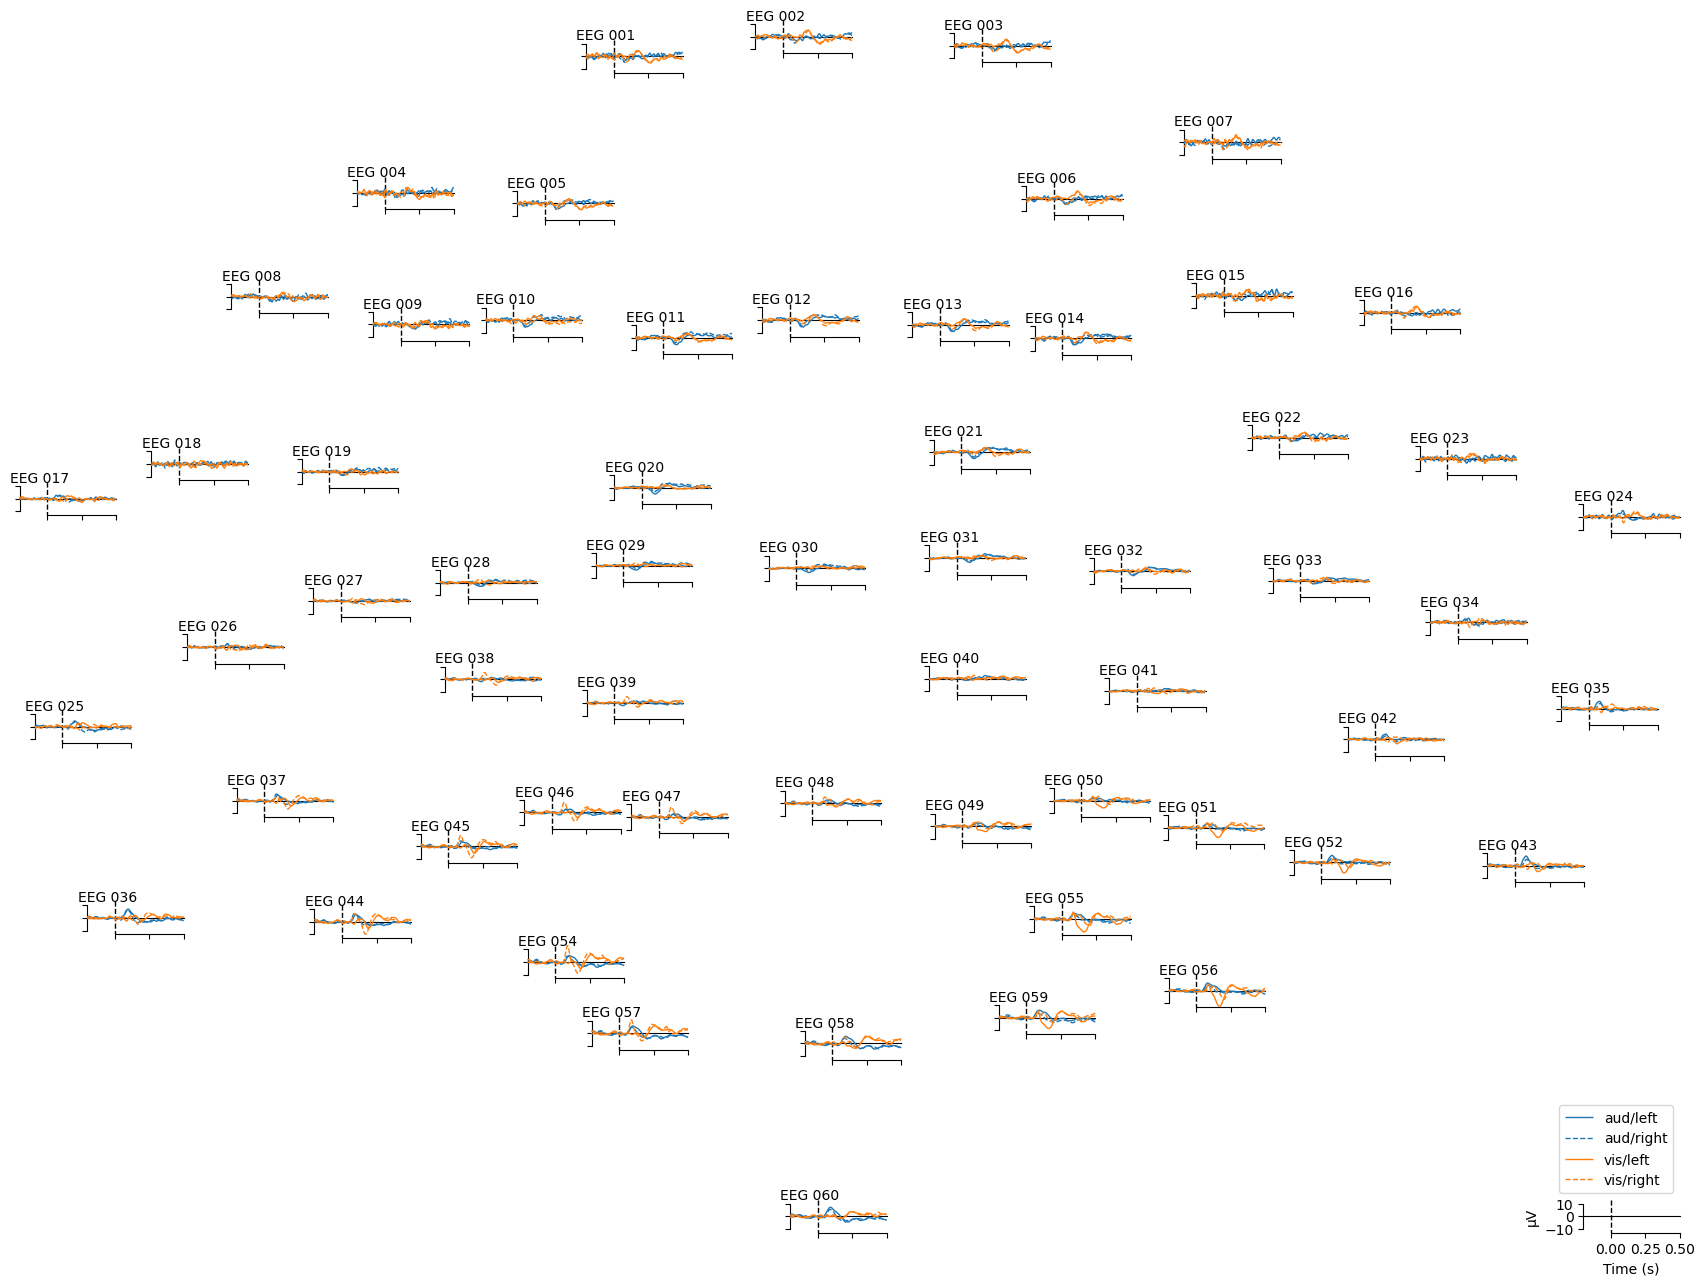

In [29]:
mne.viz.plot_compare_evokeds(evks, picks='eeg', colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'),
                             axes='topo', styles=dict(aud=dict(linewidth=1),
                                                      vis=dict(linewidth=1)));

In [30]:
subjects_dir = root.parent.parent / 'subjects'
trans_file = root / 'sample_audvis_raw-trans.fif'

In [31]:
maps = mne.make_field_map(evks['aud/left'], trans=str(trans_file),
                          subject='sample', subjects_dir=subjects_dir)
evks['aud/left'].plot_field(maps, time=0.1)

Using surface from /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Getting helmet for system 306m
Prepare EEG mapping...
Computing dot products for 59 electrodes...
Computing dot products for 2562 surface locations...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 21/59 components to omit less than 0.001 (0.00097)
    The map has an average electrode reference (2562 channels)
Prepare MEG mapping...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Computing dot products for 305 coils...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Computing dot products for 304 surface locations...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 210/305 components to omit less than 0.0001 (9.9e-05)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


Using notebook 3d backend.



In [32]:
for ch_type in ('mag', 'grad', 'eeg'):
    evk = evks['aud/right'].copy().pick(ch_type)
    _map = mne.make_field_map(evk, trans=str(trans_file), subject='sample',
                              subjects_dir=subjects_dir, meg_surf='head')
    fig = evk.plot_field(_map, time=0.1)
    mne.viz.set_3d_title(fig, ch_type, size=20);

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Using surface from /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Prepare MEG mapping...
Computing dot products for 102 coils...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Computing dot products for 2562 surface locations...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 57/102 components to omit less than 0.0001 (9.9e-05)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Using surface from /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Prepare MEG mapping...
Computing dot products for 203 coils...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Computing dot products for 2562 surface locations...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 166/203 components to omit less than 0.0001 (9.7e-05)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Using surface from /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Prepare EEG mapping...
Computing dot products for 59 electrodes...
Computing dot products for 2562 surface locations...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 21/59 components to omit less than 0.001 (0.00097)
    The map has an average electrode reference (2562 channels)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
